In [ ]:
!pip install quandl


In [ ]:
!pip install pandas

In [ ]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np
import quandl
quandl.ApiConfig.api_key = 'qnTAjxp3yugqUSzYynkp'

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


We are going to take stock market data from API's like Quandl, morningstar and cluster them into similar groups based off stock market movements over the years. For this we are going to apply the K-means clustering algorithm.
 
 

In [ ]:
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'Symantec': 'SYMC',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Exxon': 'XOM',
'Valero Energy': 'VLO',
'Bank of America': 'BAC',
'Pfizer': 'PFE',
'Abbot Labs': 'ABT',
'Kellogg':'K',
'Chevron':'CVX',
    
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

print(companies)


[('Apple', 'AAPL'), ('Abbot Labs', 'ABT'), ('Amazon', 'AMZN'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('General Electrics', 'GE'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Kellogg', 'K'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Pfizer', 'PFE'), ('Symantec', 'SYMC'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [ ]:

stocko = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'AMZN', 'BA', 'BAC', 'GE', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSFT', 'NAV', 'NOC', 'PEP', 'SYMC', 'TXN', 'VLO', 'WBA', 'XOM', 'PFE','ABT','K','CVX'],
                        qopts = { 'columns': ['ticker', 'date', 'Open'] }, 
                        date = { 'gte': '2016-12-31', 'lte': '2018-12-31' }, 
                        paginate=True)

new = stocko.set_index('date') # now we are using date as index
print(new)
stock_open= new.pivot(columns='ticker') # using ticker value as column
print(stock_open)
stock_open.fillna(0, inplace=True)#basic assumption if opening data unavailable, closing also unavailabe , fill NaN values with 0

print(stock_open)

           ticker    open
date                     
2018-03-27    XOM   74.00
2018-03-26    XOM   73.65
2018-03-23    XOM   73.81
2018-03-22    XOM   74.42
2018-03-21    XOM   74.23
...           ...     ...
2017-01-09   AAPL  117.95
2017-01-06   AAPL  116.78
2017-01-05   AAPL  115.92
2017-01-04   AAPL  115.85
2017-01-03   AAPL  115.80

[7720 rows x 2 columns]
              open                            ...                             
ticker        AAPL      ABT     AMZN      BA  ...     TXN    VLO    WBA    XOM
date                                          ...                             
2017-01-03  115.80  38.6334   757.92  156.30  ...   73.53  69.55  83.10  90.94
2017-01-04  115.85  39.0600   758.39  157.81  ...   73.65  69.54  83.30  91.12
2017-01-05  115.92  39.2400   761.55  158.41  ...   73.29  68.39  82.00  90.19
2017-01-06  116.78  39.7000   782.36  158.98  ...   72.88  67.70  83.08  88.79
2017-01-09  117.95  40.7900   798.00  159.00  ...   74.51  66.22  82.81  88.22
...  

In [ ]:


stockc = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'AMZN', 'BA', 'BAC', 'GE', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSFT', 'NAV', 'NOC', 'PEP', 'SYMC', 'TXN', 'VLO', 'WBA', 'XOM', 'PFE','ABT','K','CVX'],
                        qopts = { 'columns': ['ticker', 'date', 'Close'] },
                        date = { 'gte': '2016-12-31', 'lte': '2018-12-31' }, 
                        paginate=True)

new = stockc.set_index('date')


stock_close= new.pivot(columns='ticker')

stock_close.fillna(0, inplace=True)
print(stock_close)

              close                          ...                             
ticker         AAPL    ABT     AMZN      BA  ...     TXN    VLO    WBA    XOM
date                                         ...                             
2017-01-03  116.150  39.05   753.67  156.97  ...   73.58  70.42  82.96  90.89
2017-01-04  116.020  39.36   757.18  158.62  ...   73.49  67.89  82.98  89.89
2017-01-05  116.610  39.70   780.45  158.71  ...   72.92  67.68  83.03  88.55
2017-01-06  117.910  40.78   795.99  159.10  ...   74.15  66.66  83.10  88.50
2017-01-09  118.990  40.74   796.92  158.32  ...   74.34  66.37  82.55  87.04
...             ...    ...      ...     ...  ...     ...    ...    ...    ...
2018-03-21  171.270  62.42  1581.86  337.10  ...  108.64  95.45  66.27  75.04
2018-03-22  168.845  60.93  1544.10  319.61  ...  103.90  93.04  65.83  73.50
2018-03-23  164.940  59.50  1495.56  321.00  ...  101.36  91.22  65.43  72.89
2018-03-26  172.770  61.07  1555.86  328.97  ...  106.60  94.25 

Incase you would like to use any other online source instead of quandl, use pandas_datareader


data_source = 'morningstar'//depriciated


start_date = '2015-01-01'
end_date = '2017-12-31'


panel_data = data.DataReader(companies_dict.values(), data_source, start_date, end_date).unstack(level=0)


stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])


In [ ]:
stock_close = np.array(stock_close).T  #.T for Transpose
stock_open = np.array(stock_open).T


print(stock_close)


[[ 116.15  116.02  116.61 ...  164.94  172.77  168.34]
 [  39.05   39.36   39.7  ...   59.5    61.07   60.28]
 [ 753.67  757.18  780.45 ... 1495.56 1555.86 1497.05]
 ...
 [  70.42   67.89   67.68 ...   91.22   94.25   92.27]
 [  82.96   82.98   83.03 ...   65.43   67.47   65.96]
 [  90.89   89.89   88.55 ...   72.89   74.     73.7 ]]


In [ ]:
row, col = stock_close.shape # dimensions of array in tuple form

movements = np.zeros([row, col]) # zero array of rowxcol


for i in range(0, len(companies)):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:]) # this subtracts element wise 
    # np[i,:]== array[i]
print(movements)

for i in range(0, row):
   print('Company: {}, Change: {}'.format(companies[i][:], sum(movements[i][:])))
    

[[ 3.500e-01  1.700e-01  6.900e-01 ... -3.450e+00  4.700e+00 -5.340e+00]
 [ 4.166e-01  3.000e-01  4.600e-01 ... -1.530e+00  7.900e-01 -9.900e-01]
 [-4.250e+00 -1.210e+00  1.890e+01 ... -4.345e+01  2.586e+01 -7.535e+01]
 ...
 [ 8.700e-01 -1.650e+00 -7.100e-01 ... -2.570e+00  1.870e+00 -2.020e+00]
 [-1.400e-01 -3.200e-01  1.030e+00 ... -6.300e-01  1.340e+00 -1.880e+00]
 [-5.000e-02 -1.230e+00 -1.640e+00 ... -9.200e-01  3.500e-01 -3.000e-01]]
Company: ('Apple', 'AAPL'), Change: 18.156099999999896
Company: ('Abbot Labs', 'ABT'), Change: 14.755599999999866
Company: ('Amazon', 'AMZN'), Change: -27.05500000000029
Company: ('Boeing', 'BA'), Change: 73.7655000000004
Company: ('Bank of America', 'BAC'), Change: -2.5699999999999648
Company: ('Chevron', 'CVX'), Change: -13.279000000000067
Company: ('General Electrics', 'GE'), Change: -15.076
Company: ('IBM', 'IBM'), Change: -30.626000000000005
Company: ('Intel', 'INTC'), Change: 6.495099999999937
Company: ('Johnson & Johnson', 'JNJ'), Change: 9.44

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


# Create a normalizer: normalizer
normalizer = Normalizer()
# this first fits data and then transforms 
# 2d normalization is around axis 1 by default
# "fit" computes the mean and std to be used for later scaling. (just a computation), nothing is given to you. 
# "transform" uses a previously computed mean and std to autoscale the data (subtract mean from all values and then divide it by std).
# "fit_transform" does both at the same time.
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())
print(new.shape)

0.34420207311875683
-0.36327093647747827
0.00023108809752302065
(25, 309)


In [ ]:
# Normalizer for use in pipeline
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
# no. of clusters and max no. of iterations that the kmeans algo will take 
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans: pipeline
# pipeline combines feature scaling of data and also applies the algorithm 
# make_pipeline -- we dont need to use string names like in pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)
# this gives Sum of squared distances of samples to their closest cluster center.
print(kmeans.inertia_)

7.107389698701663


In [ ]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
1        0         (Abbot Labs, ABT)
19       0             (Pfizer, PFE)
9        0  (Johnson & Johnson, JNJ)
24       1              (Exxon, XOM)
22       1      (Valero Energy, VLO)
5        1            (Chevron, CVX)
4        2    (Bank of America, BAC)
16       2           (Navistar, NAV)
21       3  (Texas Instruments, TXN)
8        3             (Intel, INTC)
17       4   (Northrop Grumman, NOC)
12       4    (Lockheed Martin, LMT)
3        4              (Boeing, BA)
13       5          (MasterCard, MA)
14       5          (McDonalds, MCD)
15       5         (Microsoft, MSFT)
20       5          (Symantec, SYMC)
2        5            (Amazon, AMZN)
0        5             (Apple, AAPL)
23       6           (Walgreen, WBA)
18       7              (Pepsi, PEP)
11       7           (Coca Cola, KO)
7        8                (IBM, IBM)
6        8   (General Electrics, GE)
10       9              (Kellogg, K)


This looks fine, but Symantec, VLO, GE, MCD these look a bit odd, lets see


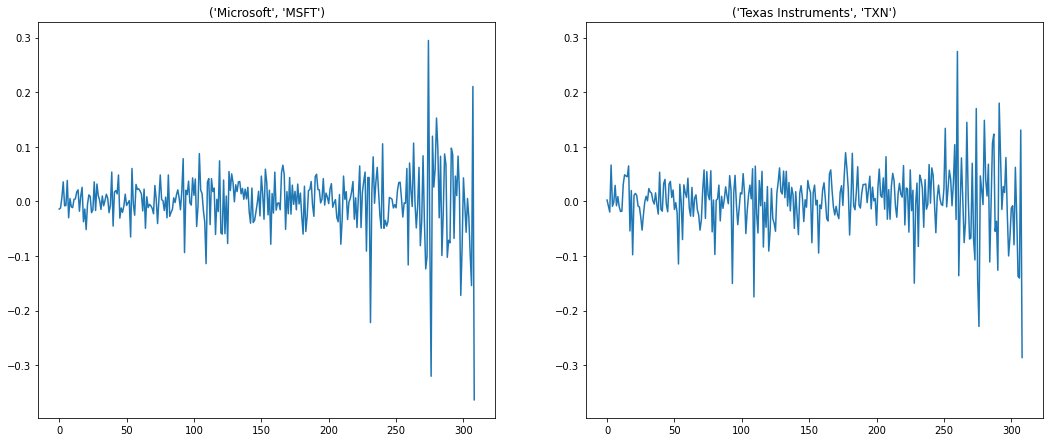

In [ ]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[15][:])#change company label
plt.title(companies[15])#change company title

plt.subplot(222, sharey=ax1)
plt.plot(new[21][:])#change company label
plt.title(companies[21])#change company title
plt.show()

The graphs give us a good idea as to why they are classified or not classified in the same group



In [ ]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)
print(labels)


[5 6 5 1 2 3 3 8 1 6 7 0 4 4 6 5 9 4 0 6 1 5 2 8 3]


    labels                 companies
18       0              (Pepsi, PEP)
11       0           (Coca Cola, KO)
20       1          (Symantec, SYMC)
3        1              (Boeing, BA)
8        1             (Intel, INTC)
22       2      (Valero Energy, VLO)
4        2    (Bank of America, BAC)
24       3              (Exxon, XOM)
5        3            (Chevron, CVX)
6        3   (General Electrics, GE)
17       4   (Northrop Grumman, NOC)
13       4          (MasterCard, MA)
12       4    (Lockheed Martin, LMT)
15       5         (Microsoft, MSFT)
2        5            (Amazon, AMZN)
21       5  (Texas Instruments, TXN)
0        5             (Apple, AAPL)
14       6          (McDonalds, MCD)
9        6  (Johnson & Johnson, JNJ)
19       6             (Pfizer, PFE)
1        6         (Abbot Labs, ABT)
10       7              (Kellogg, K)
7        8                (IBM, IBM)
23       8           (Walgreen, WBA)
16       9           (Navistar, NAV)


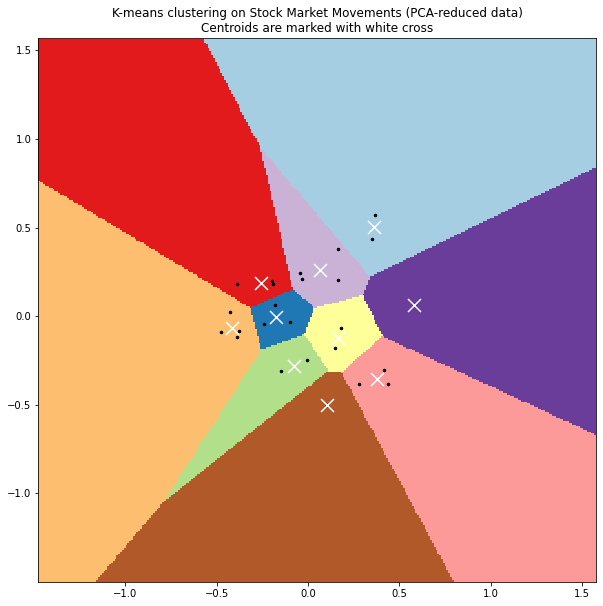

In [ ]:

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# x axis boundary we take min and max of reduced_data [,: 0] because this is n x 2 matrix
# [, :0] corresponds to x and [,: 1] to y 
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# arrange is like range fn but works for decimals also
# mesh grid takes range of values for x and y and makes a mesh with each point
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show() 